In [33]:
# This file contains a comparison between KNN, Decision Tree and Random Forest Classifier Algorithms, applied on Asteroid Impacts Dataset
# to predict if there would be a possible asteroid impact on Earth. It also contains visualization, generalization, overfitting & underfitting checks.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import validation_curve

In [34]:
# To read CSV data
df = pd.read_csv("C:/Users/Aditi Arora/Documents/FORE/Trimester 3/MLP/archive/dataset.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

# Data exploration

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [4]:
df.shape

(91713, 85)

In [5]:
df.size

7795605

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [6]:
pd.set_option("display.max_columns", None)
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.

In [7]:
df.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('Unnamed: 83',axis=1,inplace=True)

In [10]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [11]:
df.hospital_death.unique()

array([0, 1], dtype=int64)

In [12]:
df.hospital_death.value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

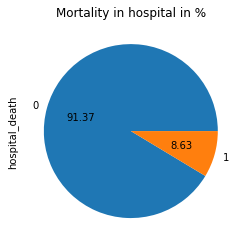

In [13]:
_=df.hospital_death.value_counts().plot(kind='pie',autopct="%.2f",title ='Mortality in hospital in %')

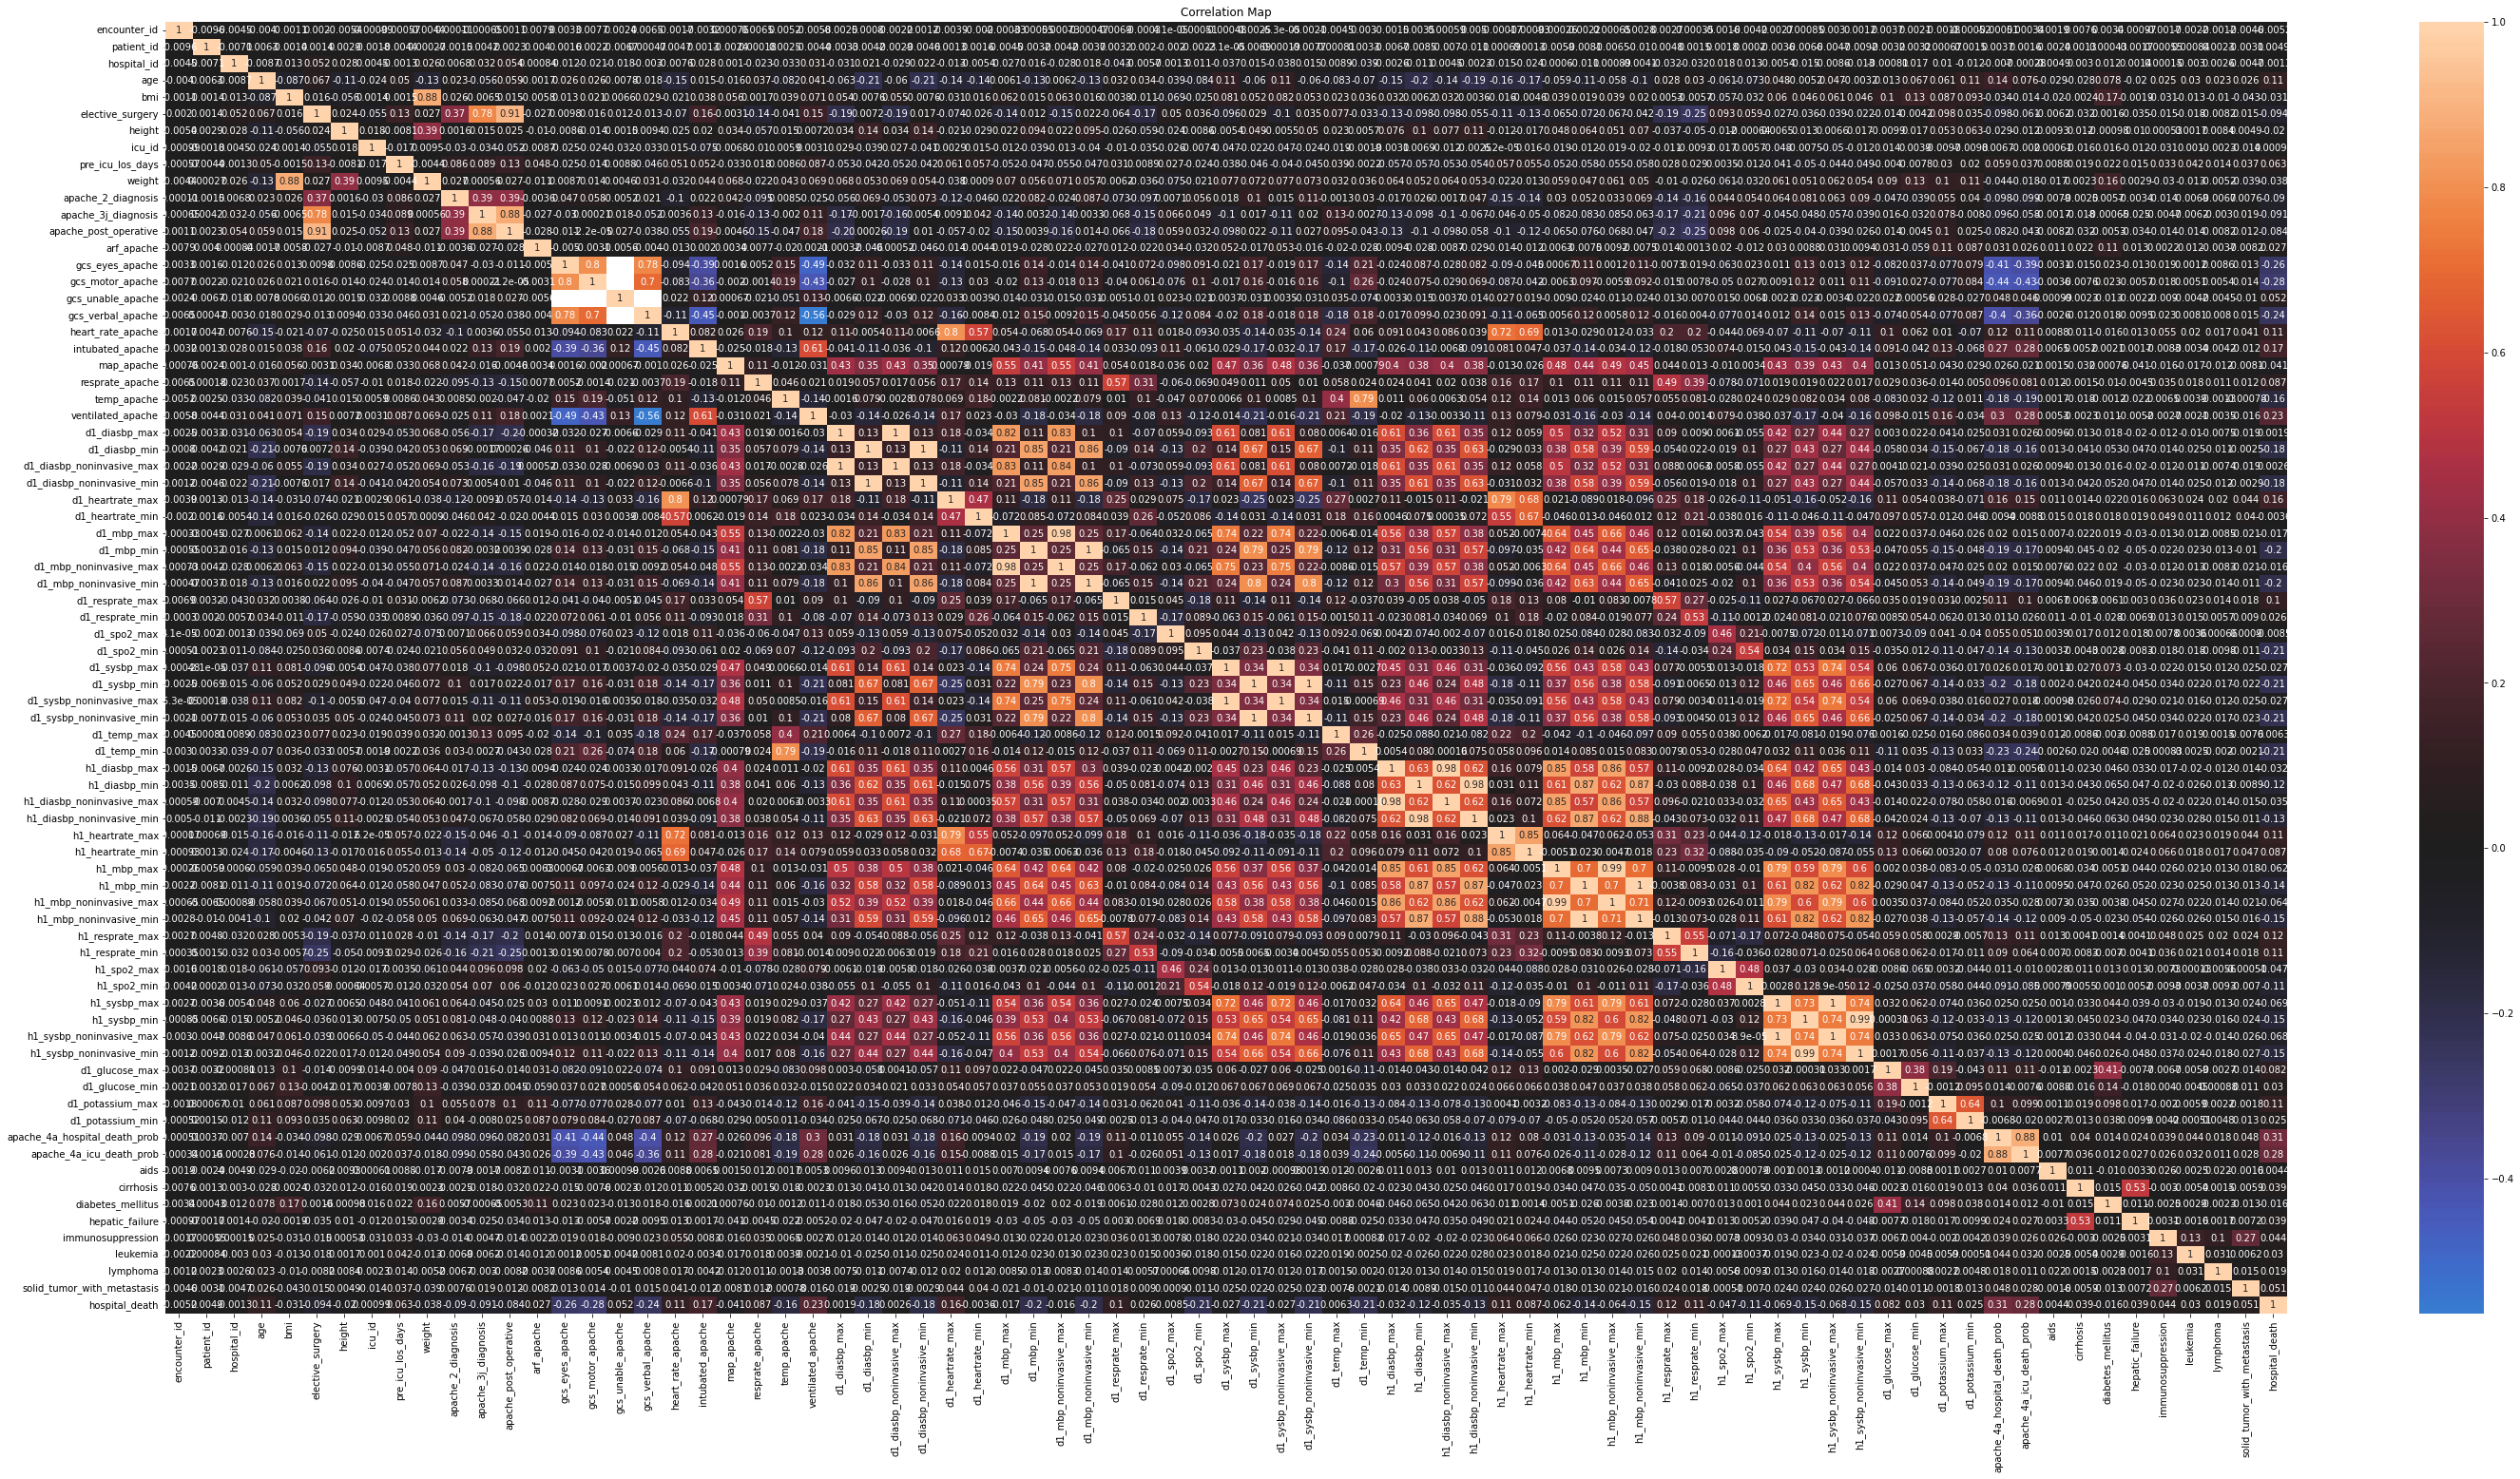

In [16]:
plt.figure(figsize=(50,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [16]:
#p = sns.pairplot(df)

In [17]:
#p = sns.pairplot(df, x_vars=['Temperature(°C)','Dew point temperature(°C)','Visibility (10m)'],y_vars='hospital_death', size = 7 , aspect=0.7)

In [17]:
df = df.dropna()

In [35]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values
print(category_features)

['ethnicity' 'gender' 'icu_admit_source' 'icu_stay_type' 'icu_type'
 'apache_3j_bodysystem' 'apache_2_bodysystem']


In [38]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.values
print(num_features)

['encounter_id' 'patient_id' 'hospital_id' 'age' 'bmi' 'elective_surgery'
 'height' 'icu_id' 'pre_icu_los_days' 'weight' 'apache_2_diagnosis'
 'apache_3j_diagnosis' 'apache_post_operative' 'arf_apache'
 'gcs_eyes_apache' 'gcs_motor_apache' 'gcs_unable_apache'
 'gcs_verbal_apache' 'heart_rate_apache' 'intubated_apache' 'map_apache'
 'resprate_apache' 'temp_apache' 'ventilated_apache' 'd1_diasbp_max'
 'd1_diasbp_min' 'd1_diasbp_noninvasive_max' 'd1_diasbp_noninvasive_min'
 'd1_heartrate_max' 'd1_heartrate_min' 'd1_mbp_max' 'd1_mbp_min'
 'd1_mbp_noninvasive_max' 'd1_mbp_noninvasive_min' 'd1_resprate_max'
 'd1_resprate_min' 'd1_spo2_max' 'd1_spo2_min' 'd1_sysbp_max'
 'd1_sysbp_min' 'd1_sysbp_noninvasive_max' 'd1_sysbp_noninvasive_min'
 'd1_temp_max' 'd1_temp_min' 'h1_diasbp_max' 'h1_diasbp_min'
 'h1_diasbp_noninvasive_max' 'h1_diasbp_noninvasive_min'
 'h1_heartrate_max' 'h1_heartrate_min' 'h1_mbp_max' 'h1_mbp_min'
 'h1_mbp_noninvasive_max' 'h1_mbp_noninvasive_min' 'h1_resprate_max'
 'h1_re

In [ ]:
category_col = ['job','marital','education','default','housing','loan','month','poutcome', 'y']
for col in category_col:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [19]:
cols = ['ethnicity','gender','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,2,1,180.3,1,92,0,2,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,114252,59342,81,77.0,27.420000,0,2,0,160.0,1,90,0,5,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
5,33181,74489,83,67.0,27.560000,0,2,1,190.5,0,95,0,5,0.000694,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0
10,105427,125898,77,72.0,28.257052,1,3,0,154.9,2,113,0,5,0.004861,67.8,303.0,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,91.0,87.0,91.0,87.0,23.0,14.0,99.0,93.0,145.0,114.0,145.0,114.0,158.0,133.0,4.2,4.2,0.01,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,6,0
17,22471,112115,118,46.0,25.845717,0,3,1,167.6,0,92,0,2,0.000000,72.6,108.0,203.01,0,0.0,1.0,4.0,0.0,1.0,114.0,1.0,113.0,34.0,36.4,1.0,89.0,61.0,89.0,61.0,98.0,64.0,113.0,76.0,113.0,76.0,22.0,9.0,100.0,88.0,169.0,102.0,169.0,102.0,37.1,36.4,89.0,63.0,89.0,63.0,94.0,80.0,104.0,88.0,104.0,88.0,21.0,9.0,99.0,95.0,169.0,115.0,169.0,115.0,143.0,143.0,4.9,4.9,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0


# Train Test split

In [23]:
x = df.drop(['encounter_id','patient_id','hospital_id','hospital_death','icu_id'], axis =1 )
y = df.iloc[:, -1]

sc = StandardScaler()
X = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
#X.head()

# KNN

In [22]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

KeyboardInterrupt: 

In [24]:
LR = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

In [25]:
LR.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [26]:
print("Accuracy ", LR.score(X_test, y_test))

Accuracy  0.8943270300333704


# Gini

In [27]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                                #'None' means full tree till single leaf
           )

In [28]:
df.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_te = df.predict(X_test)

In [30]:
#gini accuracy
np.sum((y_test == y_te))/y_test.size  

0.8806861424975119

IndexError: list index out of range

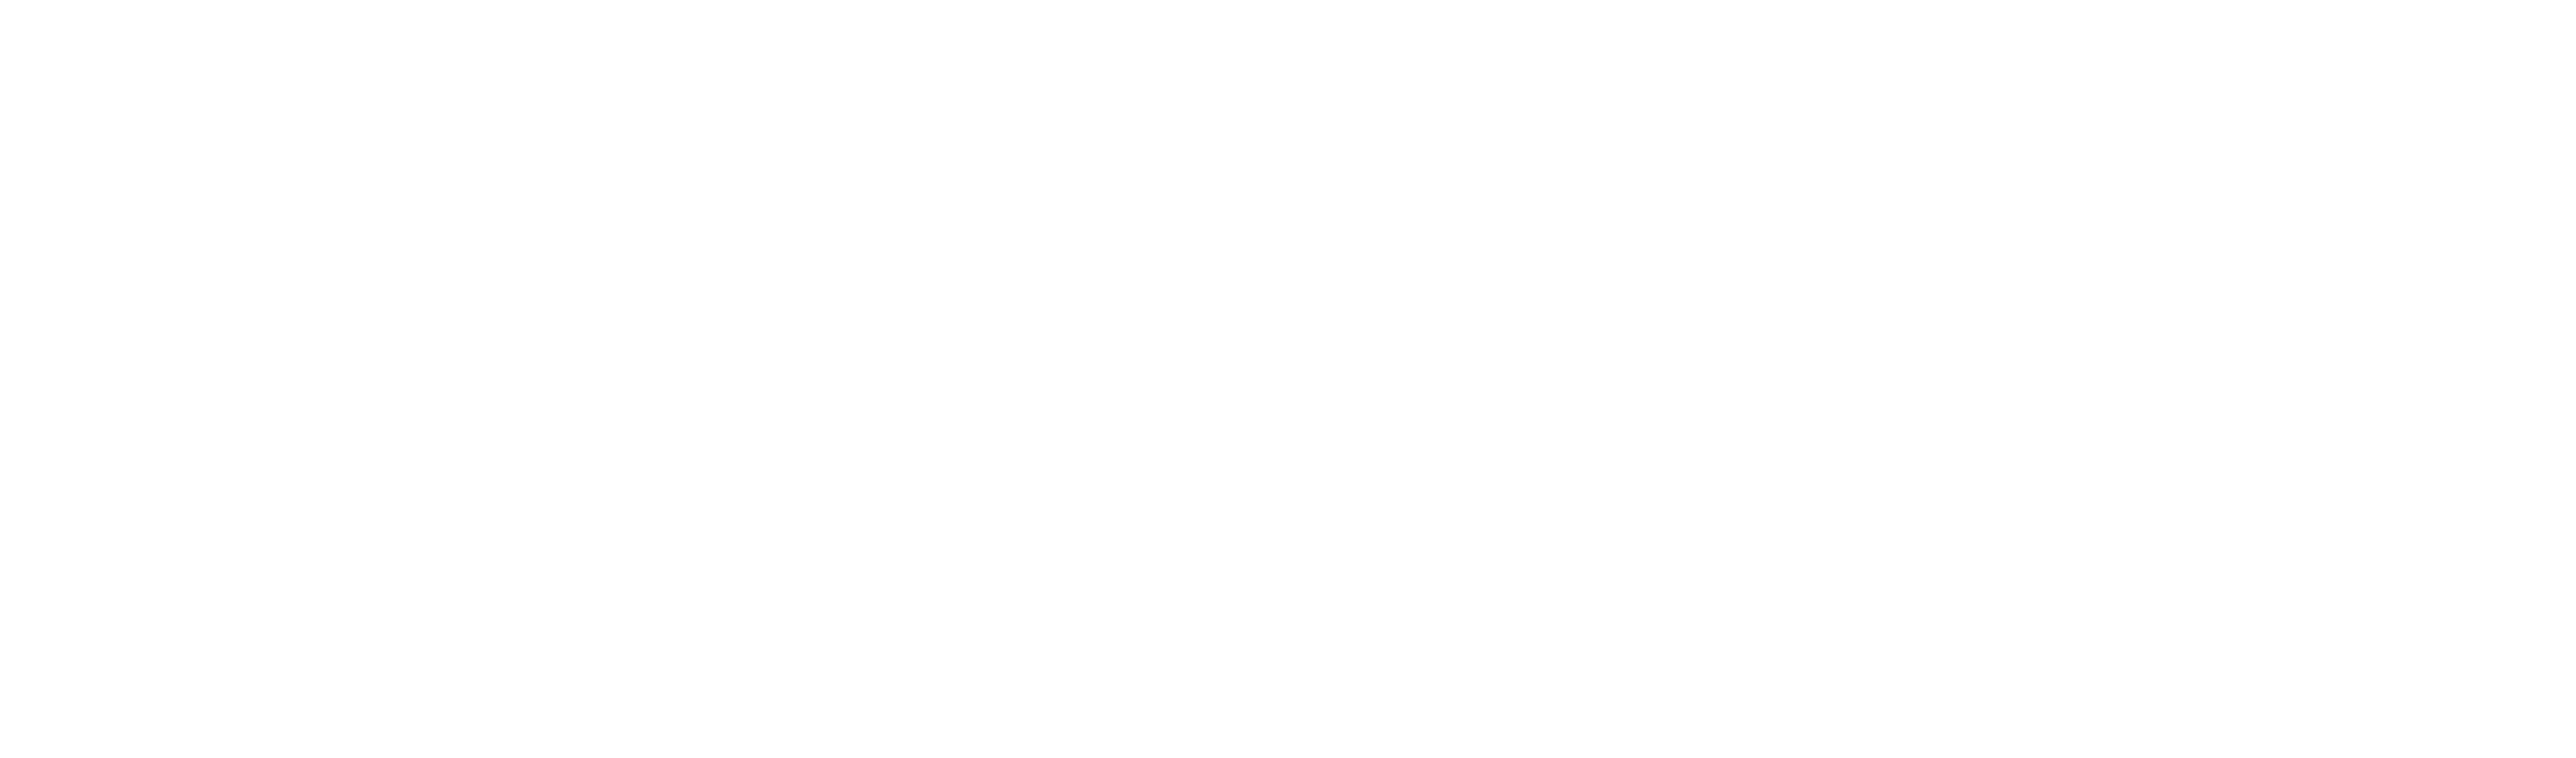

In [31]:
_=plt.figure(figsize=(100,30))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo'],
            class_names = ['1','2','3']
            )

_=plt.show()

# Entropy

In [ ]:
df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=df.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(100,30))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo'],
            class_names = ['1','2','3']
            )

_=plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.35,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

df = dtree(
           criterion="entropy",    
           max_depth=None       
                              
           )
##
_=df.fit(X_train,y_train)

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            df,
            max_depth = 3,  
            rounded = True, 
            filled = True,  
            impurity = True,
            node_ids = True,
            feature_names = ['obj','Period_start','Period_end','Possible_impacts','C_imp_prob','asteroid_vel','asteroid_mag','asteroid_dia','C_palermo','max_palermo'],
            class_names = ['1','2','3']
            )

_=plt.show()

In [ ]:
#entropy accuracy
y_te = df.predict(X_test)
np.sum((y_test == y_te))/y_test.size 

# Random Forest

In [ ]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy score is: ", accuracy_score(y_test, y_pred))

In [ ]:
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Conclusion
### KNN Accuracy: 0.9817518248175182
### Gini Accuracy: 1.0
### Entropy Accuracy: 1.0
### Random Forest Accuracy: 0.9958333333333333

### Hence based on the accuracy obtained we can see that D-tree (entropy) has the best accuracy for this dataset

# Overfitting and underfitting checks

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, X, y,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [ ]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

In [ ]:
scores.plot.hist(bins=50, edgecolor="black", density=True)
plt.xlabel("Mean absolute error (k$)")
plt.title("Train and test errors distribution via cross-validation")

In [ ]:
max_depth = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(regressor, X, y, param_name="max_depth", param_range=max_depth,cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

In [ ]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

In [ ]:
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")